In [2]:
#importing necessarypython libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#creating the dataframe
data = pd.read_csv("Zomato-data-.csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [14]:
#Analysing data
# data.columns
data.describe()
# data.shape

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
#data cleaning and preparation
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
data['rate'] = data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
#getting summary of the dataframe use df.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
#checking for missing values
print(data.isnull().sum())
#There is no null values in the dataset

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


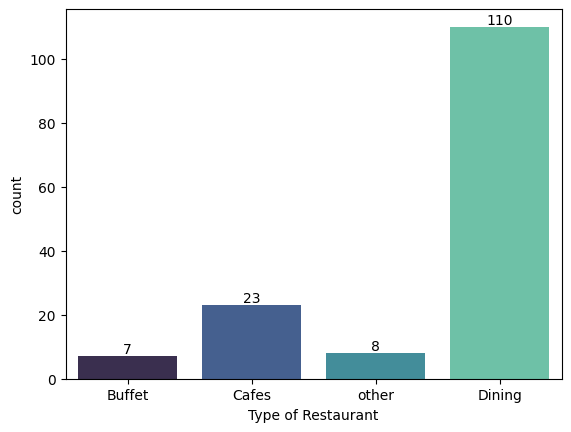

In [26]:
# Exploring Restaurant Types
#1. Let's see the listed_in (type) column to identify popular restaurant categories.
ax = sns.countplot(
    x = 'listed_in(type)',
    data = data,
    hue = 'listed_in(type)',
    palette = 'mako',
    legend = False
)

#Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2. , p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0,5), textcoords='offset points'
    )
plt.xlabel("Type of Restaurant")
plt.show()

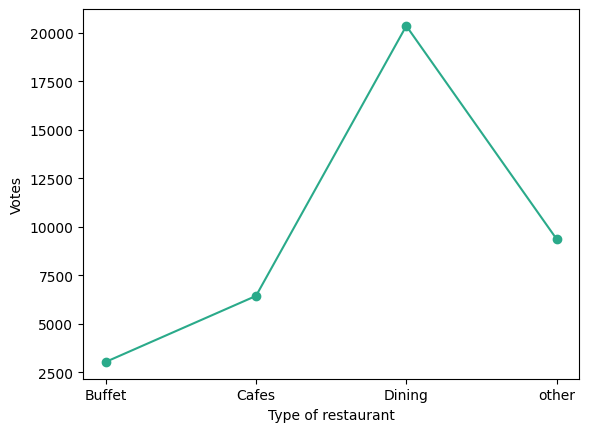

In [36]:
#Visualizing votes by restaurant types
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='#2AAA8A', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
#conclusion: Dining restaurants are prefered by a larger number of individuals.

In [40]:
# find the name of most voted restaurant
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, 'name']
print('Restaurant(s) with maximum votes: ',restaurant_with_max_votes)
print('Number of votes:', max_votes)

Restaurant(s) with maximum votes:  38    Empire Restaurant
Name: name, dtype: object
Number of votes: 4884


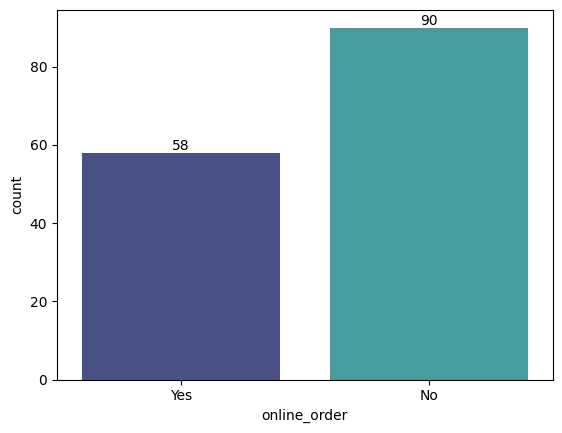

In [47]:
#Online Order Availability
online= sns.countplot(
              x= data['online_order'],
              hue = data['online_order'],
              palette = 'mako'
             )
#Add counts on top of bars
for p in online.patches:
    online.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2. , p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0,5), textcoords='offset points'
    )
#Conclusion: Majority of restarants do not accept online orders


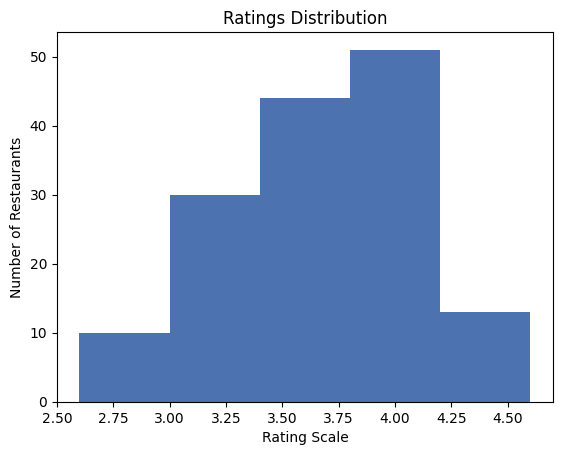

In [59]:
#Analyze Ratings
plt.hist(data['rate'], bins=5, color='#4C72B0')
plt.title('Ratings Distribution')

plt.xlabel("Rating Scale")
plt.ylabel("Number of Restaurants")
plt.show()
#Conclusion: The majority of restaurants recieves ratings ranging from 3.5 to 4 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

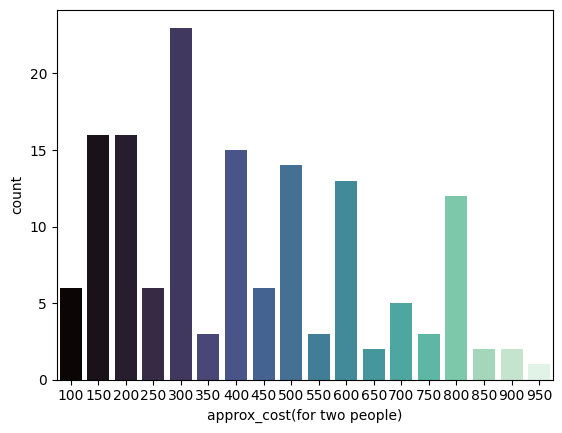

In [64]:
#Approximate Cost for Couples
couple_data = data['approx_cost(for two people)']
sns.countplot(x = couple_data,
              hue = couple_data,
              palette='mako',
              legend = False
             )

#Conclusion: The majority of couples prefer restaurants with an approx cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

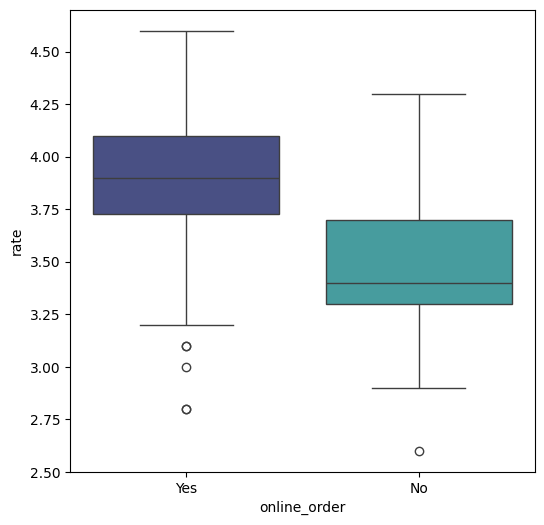

In [69]:
#Rating Comparison -Online vs Offline
plt.figure(figsize= (6,6))
sns.boxplot(
    x = 'online_order',
    y = 'rate',
    data = data,
    palette= 'mako',
    hue = 'online_order',
    legend = False
    
)
#Conclusion- Offline orders received lower ratings in comparison to offline orders which obtained excellent ratings.

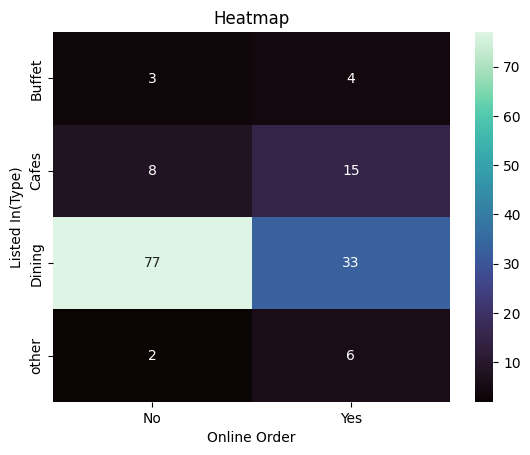

In [73]:
#Order Mode Preferences by Restaurant Type


pivot_table = data.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='mako', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In(Type)')
plt.show()